In [1]:
import pandas as pd
import numpy as np
import pickle
import xgboost
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier 
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
import seaborn as sns

In [3]:
    %matplotlib inline
    sns.set()

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/SBI_Life_insurance.csv")

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [10]:
data.corr()['insuranceclaim']

age               0.113723
sex               0.031565
bmi               0.384198
children         -0.409526
smoker            0.333261
region            0.020891
charges           0.309418
insuranceclaim    1.000000
Name: insuranceclaim, dtype: float64

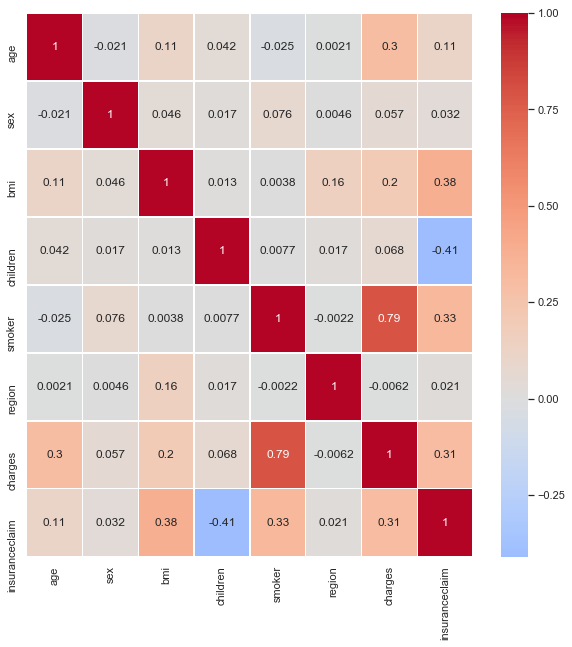

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

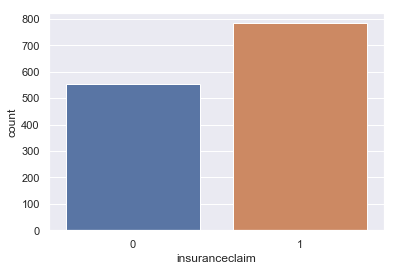

In [13]:
sns.countplot(x='insuranceclaim', data=data)

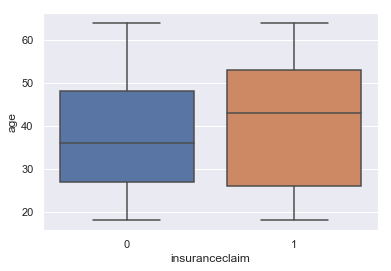

In [14]:
sns.boxplot('insuranceclaim', 'age', data = data)

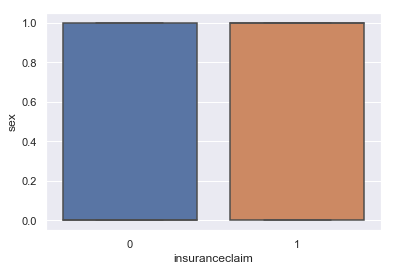

In [15]:
sns.boxplot('insuranceclaim', 'sex', data = data)

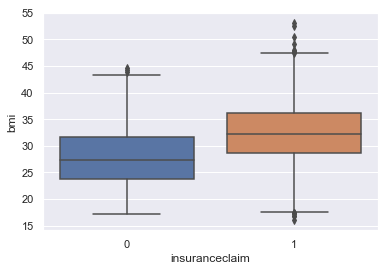

In [16]:
sns.boxplot('insuranceclaim', 'bmi', data = data)

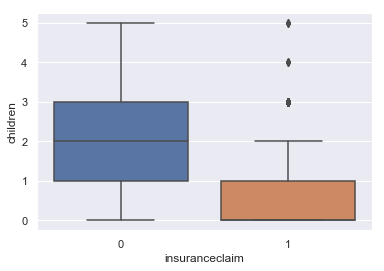

In [17]:
sns.boxplot('insuranceclaim', 'children', data = data)

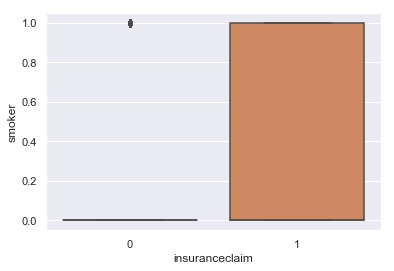

In [18]:
sns.boxplot('insuranceclaim', 'smoker', data = data)

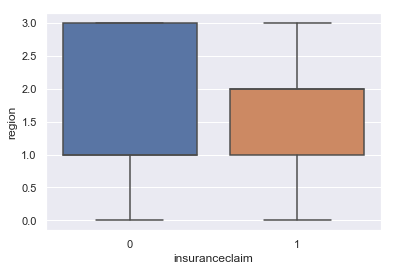

In [19]:
sns.boxplot('insuranceclaim', 'region', data = data)

In [20]:
array = data.values
X = array[:,0:7]
Y = array[:,7]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [21]:

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'



In [22]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.786916 (0.030081)
LDA: 0.861682 (0.040263)
KNN: 0.641121 (0.050881)
CART: 0.985981 (0.009577)
NB: 0.773832 (0.034415)
SVM: 0.612150 (0.055013)


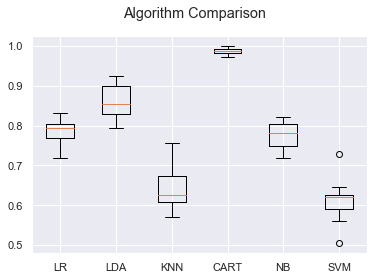

In [23]:

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [24]:

# Make predictions on validation dataset
CART = DecisionTreeClassifier()
CART.fit(X_train, Y_train)
predictions = CART.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9701492537313433
[[106   7]
 [  1 154]]
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       113
         1.0       0.96      0.99      0.97       155

   micro avg       0.97      0.97      0.97       268
   macro avg       0.97      0.97      0.97       268
weighted avg       0.97      0.97      0.97       268

